# 당뇨병 분석 

사이킷런에서 제공하는 라이브러리 사용하기 전에 선형 함수 모델을 직접 구현해보고 loss function, gradient 방식으로 모델 학습을 진행 해보고 난 이후 사이킷런에서 제공하는 회귀 모델을 적용해보겠다 

<br>
</br>

학습한다는 의미는 최적의 매개변수 혹은 파라미터를 찾아가는것이다 (가중치 업데이트 통해서이루어진다)

<br>
</br>

당뇨병의 feature name 개수 만큼 가중치 벡터를 만들어야 하고 biase 상수는 한개 정해준다 


다변수 선형 회귀 같은 경우 w개수만큼 편미분 진행해야 한다 MSE를 loss로 사용한다면 



In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [111]:
# 선형 함수 모델 정의 

# 단항 선형 회귀 
def Model(x,w,b):
    y=w*x+b
    return y


# diabest 선형 회귀
# 각 모델의 feature들로 당뇨병 수치인지 분석한다 
def Model_diabetes(x,w,b):
    predict_val = 0
    for i in range(len(w)):
        
        predict_val+= x[:,i]*w[i]
    
    predict_val+=b
    return predict_val


In [112]:
# MSE 정의하기 
def MSE(a,b):
    return ((a - b)**2).mean()


# RMSE 정의하기 
def RMSE(a,b):
    mse = MSE(a,b)
    
    return mse**0.5 # square

# Loss function 정의 하기 
def loss_function(x,w,b,y):
    pred = Model_diabetes(x,w,b)
    L = RMSE(pred,y) # pred와 실제 label과의 RMSE 
    return L 


# Gradient descent  for 단항 선형 회귀 
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


def gradient_diabetes(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = Model_diabetes(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [113]:
# initialize hyperparameter 
LEARNING_RATE = 0.01
w = np.random.rand(10) # diabetes feature 개수는 10개이다 
b = np.random.rand()
print(w)
print(b)

[0.47030135 0.51440363 0.56518611 0.71710059 0.89709003 0.05876762
 0.56039225 0.99385061 0.2687597  0.55050739]
0.34811292035449726


In [114]:
from sklearn.model_selection import train_test_split
X,y= load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Model_diabetes(X_train,w,b)

In [115]:
losses = []

for i in range(1, 10001):
    
    dW, db = gradient_diabetes(X_train, w, b, y_train)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_function(X_train, w, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 146.4819
Iteration 20 : Loss 126.3754
Iteration 30 : Loss 110.7168
Iteration 40 : Loss 98.6637
Iteration 50 : Loss 89.4920
Iteration 60 : Loss 82.5812
Iteration 70 : Loss 77.4088
Iteration 80 : Loss 73.5466
Iteration 90 : Loss 70.6546
Iteration 100 : Loss 68.4712
Iteration 110 : Loss 66.8009
Iteration 120 : Loss 65.5006
Iteration 130 : Loss 64.4677
Iteration 140 : Loss 63.6287
Iteration 150 : Loss 62.9322
Iteration 160 : Loss 62.3415
Iteration 170 : Loss 61.8310
Iteration 180 : Loss 61.3824
Iteration 190 : Loss 60.9825
Iteration 200 : Loss 60.6218
Iteration 210 : Loss 60.2935
Iteration 220 : Loss 59.9923
Iteration 230 : Loss 59.7141
Iteration 240 : Loss 59.4560
Iteration 250 : Loss 59.2154
Iteration 260 : Loss 58.9903
Iteration 270 : Loss 58.7792
Iteration 280 : Loss 58.5807
Iteration 290 : Loss 58.3935
Iteration 300 : Loss 58.2168
Iteration 310 : Loss 58.0495
Iteration 320 : Loss 57.8909
Iteration 330 : Loss 57.7404
Iteration 340 : Loss 57.5973
Iteration 350 : Loss

Iteration 3060 : Loss 53.8294
Iteration 3070 : Loss 53.8293
Iteration 3080 : Loss 53.8291
Iteration 3090 : Loss 53.8290
Iteration 3100 : Loss 53.8288
Iteration 3110 : Loss 53.8287
Iteration 3120 : Loss 53.8285
Iteration 3130 : Loss 53.8284
Iteration 3140 : Loss 53.8283
Iteration 3150 : Loss 53.8281
Iteration 3160 : Loss 53.8280
Iteration 3170 : Loss 53.8278
Iteration 3180 : Loss 53.8277
Iteration 3190 : Loss 53.8276
Iteration 3200 : Loss 53.8274
Iteration 3210 : Loss 53.8273
Iteration 3220 : Loss 53.8272
Iteration 3230 : Loss 53.8270
Iteration 3240 : Loss 53.8269
Iteration 3250 : Loss 53.8268
Iteration 3260 : Loss 53.8266
Iteration 3270 : Loss 53.8265
Iteration 3280 : Loss 53.8264
Iteration 3290 : Loss 53.8262
Iteration 3300 : Loss 53.8261
Iteration 3310 : Loss 53.8260
Iteration 3320 : Loss 53.8259
Iteration 3330 : Loss 53.8258
Iteration 3340 : Loss 53.8256
Iteration 3350 : Loss 53.8255
Iteration 3360 : Loss 53.8254
Iteration 3370 : Loss 53.8253
Iteration 3380 : Loss 53.8252
Iteration 

Iteration 6380 : Loss 53.8007
Iteration 6390 : Loss 53.8006
Iteration 6400 : Loss 53.8005
Iteration 6410 : Loss 53.8004
Iteration 6420 : Loss 53.8004
Iteration 6430 : Loss 53.8003
Iteration 6440 : Loss 53.8002
Iteration 6450 : Loss 53.8002
Iteration 6460 : Loss 53.8001
Iteration 6470 : Loss 53.8000
Iteration 6480 : Loss 53.7999
Iteration 6490 : Loss 53.7999
Iteration 6500 : Loss 53.7998
Iteration 6510 : Loss 53.7997
Iteration 6520 : Loss 53.7997
Iteration 6530 : Loss 53.7996
Iteration 6540 : Loss 53.7995
Iteration 6550 : Loss 53.7994
Iteration 6560 : Loss 53.7994
Iteration 6570 : Loss 53.7993
Iteration 6580 : Loss 53.7992
Iteration 6590 : Loss 53.7992
Iteration 6600 : Loss 53.7991
Iteration 6610 : Loss 53.7990
Iteration 6620 : Loss 53.7989
Iteration 6630 : Loss 53.7989
Iteration 6640 : Loss 53.7988
Iteration 6650 : Loss 53.7987
Iteration 6660 : Loss 53.7987
Iteration 6670 : Loss 53.7986
Iteration 6680 : Loss 53.7985
Iteration 6690 : Loss 53.7984
Iteration 6700 : Loss 53.7984
Iteration 

Iteration 9900 : Loss 53.7768
Iteration 9910 : Loss 53.7767
Iteration 9920 : Loss 53.7766
Iteration 9930 : Loss 53.7766
Iteration 9940 : Loss 53.7765
Iteration 9950 : Loss 53.7764
Iteration 9960 : Loss 53.7764
Iteration 9970 : Loss 53.7763
Iteration 9980 : Loss 53.7762
Iteration 9990 : Loss 53.7762
Iteration 10000 : Loss 53.7761


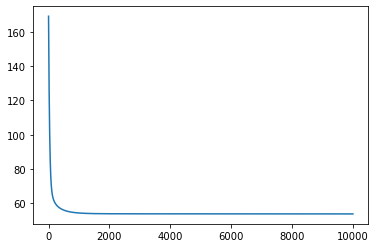

In [116]:
plt.plot(losses)
plt.show()

In [117]:
prediction = Model_diabetes(X_test, w, b)
mse = loss_function(X_test, w, b, y_test)
mse



53.71758393594395

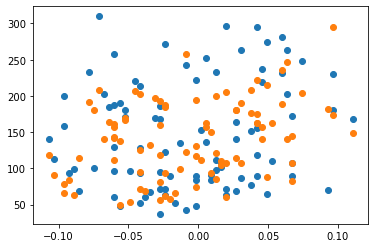

In [118]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error,r2_score,precision_score

rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)


print("r2 score is {} ".format(r2))


r2 score is 0.45536123522262273 


In [120]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape)
print(diabetes.DESCR)


(442, 10)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each 